In [2]:
# Library settings
import re
import numpy as np
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
from rich import print
from rich.table import Table
from rich.console import Console

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
terminal_width = shutil.get_terminal_size().columns

In [3]:
df = pd.read_csv("retail2010.csv")
df2 = pd.read_csv("retail2011.csv")
retaildf = pd.concat([df, df2], ignore_index=True)
print(f"\n----------Dimensi dataset GABUNGAN adalah: {retaildf.shape}")

----------Dimensi dataset GABUNGAN adalah: (1067371, 8)

## Cek Data 2009-2010


In [4]:
print("----------Isi dataset 2010---------")
display(df.head())
print(f"\n----------Dimensi dataset adalah: {df.shape}----------")
print()
print("\n --------Cek Isi Data-------")
print(df.info())

numeric_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=["string", "object"]).columns
display(f"Data numerik mencakup: {numeric_columns.to_list()}")
print(f"Data kategorikal mencakup: {categorical_columns.to_list()}")
print("Unique value pada data kategorikal:")
for column in categorical_columns:
    print(f"{column}: {df[column].unique()} = {df[column].nunique()} Unique Values")
for column in numeric_columns:
    print(f"{column}: {df[column].unique()} = {df[column].nunique()} Unique Values")

----------Isi dataset 2010---------

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


----------Dimensi dataset adalah: (525461, 8)----------

--------Cek Isi Data-------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


None

"Data numerik mencakup: ['Quantity', 'Price', 'Customer ID']"

Data kategorikal mencakup: ['Invoice', 'StockCode', 'Description', 'InvoiceDate', 'Country']

Unique value pada data kategorikal:

Invoice: ['489434' '489435' '489436' ... '538169' '538170' '538171'] = 28816 Unique Values

StockCode: ['85048' '79323P' '79323W' ... '22935' '22933' '21120'] = 4632 Unique Values

Description: ['15CM CHRISTMAS GLASS BALL 20 LIGHTS' 'PINK CHERRY LIGHTS'
 ' WHITE CHERRY LIGHTS' ... '*Boombox Ipod Classic' 'faulty'
 'Dotcom sales'] = 4681 Unique Values

InvoiceDate: ['12/1/2009 7:45' '12/1/2009 7:46' '12/1/2009 9:06' ... '12/9/2010 19:28'
 '12/9/2010 19:32' '12/9/2010 20:01'] = 25296 Unique Values

Country: ['United Kingdom' 'France' 'USA' 'Belgium' 'Australia' 'EIRE' 'Germany'
 'Portugal' 'Japan' 'Denmark' 'Nigeria' 'Netherlands' 'Poland' 'Spain'
 'Channel Islands' 'Italy' 'Cyprus' 'Greece' 'Norway' 'Austria' 'Sweden'
 'United Arab Emirates' 'Finland' 'Switzerland' 'Unspecified' 'Malta'
 'Bahrain' 'RSA' 'Bermuda' 'Hong Kong' 'Singapore' 'Thailand' 'Israel'
 'Lithuania' 'West Indies' 'Lebanon' 'Korea' 'Brazil' 'Canada' 'Iceland'] = 40 Unique Values

Quantity: [   12    48    24    10    18     3    16     4     2     6     8     1
    28    30    60    32    56     9    25    36    20   -12    -6    -4
   -24    -3    -2   576   288    27   -96    64   160  -240  -192     5
    -1    72    50    54   -50     7   800    11    58   192    96   144
   100   180   216    15   240    22   108    33    90    81   -81   -48
    17    -5    14    13    40    -8    -9    21   120   -44   230 -1043
  -117   200   168    19   280   128  -150   -18   -23    80   300   450
    61  -770  -720   480    -7    88    46   -31   -16   954  -954  -200
   504    45   467 -1012  4320  5184  4008   -25   600   505   500    23
    74    47   -89   432   252    75   184  -600  -504  -252  -246  -169
    31    38  -106   -36   360   107    49   -42    42    66   -10  -725
   222    34    52   270   -20   -30   -60  3000   400    70   936   -32
  -120    35  -126   -64  -168  -100   256  -108   -67  -360  1500    65
   -58   320   130    26   -45   -54  1002  1080   -46    29  -136 -1395
   -13    67  -350   960   864   150   126   468  -322   -76   -21   -99
   336   -29   -17   208   334   124   125   117   -47   -39    39  -396
    55  -152   -11    78   -70   -38   -19  -144   250   -91  2300   520
   920  1800   152    76    79   187   453   348   445   784    37  2000
   174   163    77   350   526    86  -113  -207    43   316  -632    98
   112    59   -14  -292   -15   -84    89  -104  -450   408   -43  1440
   832   624   204   198   608   224 -2127   -95  -260   720   900  -159
  -275   -71   -22   -75  -116   -90  -514   271    41   264   225   104
   312   164  -428   214   -68  -512  -290  -300   303   110  -190   -72
   284   118    71  -160   429  -400  1146  -109  -181   -27   -40  6012
   866  6144  2040  2520  3888  5280  4800  6768  9312 -1198 -1129  -378
  -170  -148  -121  -179   384   185   -37   -57    44  -171   -66 -3669
  -211   132  -132   -65   219  -141   -26   229    62    82   114  -243
   -51   260  -441   156  -284   460   -80    84   106  -460   374   190
  -191   -79  -210   -86   484   171 19152  3312  1344  2504  1968   482
  4176  2880  6696  1200  1400  4200   696  3360  3200  3040  2700   115
    51   -82  -377  -451 -2504  9456  -342 -4200   176    53   -53  -142
  -110   -28  -352  -128  -330  -700   700   -62   347  1008  -118   -34
   -33  -146  -129  -115   140   -69   -63   -56   -61  -455  -432  -212
  2472   524  -499  -355  -280  -420  -130   -52   -93  -299  -245   -85
   -78  -198  -283   -97  -338  -140  -800 -1782  -205   141   537 -3300
   129  -122  -310  -250   -35   -59   -49 -2916  -370    99   205   247
  -233   420   372  2016  -134    87   992 12960 12480 12744  1110  4608
  5364  1152    68    91   148 -1060  1000   640   -92  -900  -394 10000
   -74 -5200 -5000   899  -161  -328  -127   135   -41   840   816  -267
 -3140   210   161   188   145   189    73   363   234    93    83   101
    57   267   324   648    85  -112  -716  -114  -276   -55   102  -408
 -1020 -9200 -1440 -1800 -4800   498   768  -288  -204   681   528  2651
   327 -1120   246   516  -135  -173  -218   -88   299  3600   -98  -234
  -145  -257   560 -3000  -843    97  -180  -626  -309 -3340   392   -73
   396   612 10200   -87   322 -2200  -119  -359  -259  -201  -125   279
  -966  -101  -143  -194 -1000  -105  -220  -225 -9000  -193 -2300   195
  -500  -156   105   175  -480  -312   404   136 -1200  -235   598  -111
  -163  -196   680   540  5000  2500  -244   808  2664  1728   228  2972
  1098  1128   684  -590   -77  -440   142   276  -851  -230   207  -123
  -164   134   830  -830   730   122   293  3500   287  -588  -399  -285
  1056   220   352 -1158   850  -107  2400  -266   170  -576  -320  -648
   248   330  -155 -7100  -239    95  -137  -256 -7000  -151  -153  -264
  -599  2560   113 -2560   235  -162   387  -387  -206  2304  1120  6000
  9600   985 -1227  3936  2976  4752  1872  1116   567   984  1308  2112
  2952  4992  2496  3648  1536  1248  1632  7008

Price: [  6.95   6.75   2.1  ... 620.68 822.94  85.79] = 1606 Unique Values

Customer ID: [13085. 13078. 15362. ... 12942. 13369. 15211.] = 4383 Unique Values

## Cek Data 2010-2011


In [5]:
print("----------Isi dataset 2011---------")
display(df2.head())
print(f"\n----------Dimensi dataset adalah: {df2.shape}----------")
print("\n --------Cek Isi Data-------")
print(df2.info())

numeric_columns = df2.select_dtypes(include=[np.number]).columns
categorical_columns = df2.select_dtypes(include=["string", "object"]).columns
print(f"Data numerik mencakup: {numeric_columns.to_list()}")
print(f"Data kategorikal mencakup: {categorical_columns.to_list()}")
print("Unique value pada data kategorikal:")
for column in categorical_columns:
    print(f"{column}: {df2[column].unique()} = {df2[column].nunique()} Unique Values")
for column in numeric_columns:
    print(f"{column}: {df2[column].unique()} = {df2[column].nunique()} Unique Values")

----------Isi dataset 2011---------

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


----------Dimensi dataset adalah: (541910, 8)----------

--------Cek Isi Data-------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


None

Data numerik mencakup: ['Quantity', 'Price', 'Customer ID']

Data kategorikal mencakup: ['Invoice', 'StockCode', 'Description', 'InvoiceDate', 'Country']

Unique value pada data kategorikal:

Invoice: ['536365' '536366' '536368' ... '581585' '581586' '581587'] = 25900 Unique Values

StockCode: ['85123A' '71053' '84406B' ... '90214U' '47591b' '23843'] = 4070 Unique Values

Description: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE'] = 4223 Unique Values

InvoiceDate: ['12/1/2010 8:26' '12/1/2010 8:28' '12/1/2010 8:34' ... '12/9/2011 12:31'
 '12/9/2011 12:49' '12/9/2011 12:50'] = 23260 Unique Values

Country: ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA'] = 38 Unique Values

Quantity: [     6      8      2      3     32      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204     69    -36
   -192   -144    160   2880   1400     39    -48    -50     26   1440
     31     82     78     97     98     35     57    -20    110    -22
    -30    -70   -130    -80   -120    -40    -25    -14    -15    -69
   -140   -320     -8    720    156    324     38     37     49     95
     -9    -11     29     41    -72    -35    -21    -43    -19    -18
    -44    402    378    150    300     54    104     67    258     66
     44     55     46     99     61    408    972    208   1008   1000
    -77   1488    250   1394    400   -223   -150    -13    -33   -723
   -177     79     84    -32   -100    -28    272   -145    -47    -96
    113     45    106     68    267    115     65   1728    -60    -16
     53   -240     76    460     71     43    213     58    576   2400
    500    180   -300   -500    -23    752    960   1296    210    172
    215    129    138    116    135    197   -106    -54    -17   -939
    147    168    256   -201    -53    -29  -2600   -990   -290    -45
    860   1010   1356   1284    186    114    360   1930   2000   3114
   1300    670    111    211     59   -310    -61    -41    176    648
     62  74215 -74215    -64    -84     89  -1400     73    -57    112
    456    -59    -31   5568   2560    136    900   -600    -42    -94
   -207    -52    130   -206   2592    420    800    101   1200    864
   -217     94  -1430   1287   -162   -230   -173   -390   -234    504
    123    118    -76   -200   1056   1500    280    407    141    124
    -99     51    -92   -741   3906   -400   -114    102   1152    -88
    198    117     86   -720    125    -86   -391    -87   -278    140
    228   -154  -3000     81   -675   -345   -210   -975  -1200  -1121
    -27   -541  -1277   -197   3000  -1100    -63  -5368    219   -259
    232    -82   -178    170   -110    768     88    700   -102   2160
   -323   -450   -232    -83   -153   -524  -2472    -49   -105    342
    304    167    -34    640    175    220     74     93    164    163
     63    637    122    158    165    350    -46    -75   -690    -39
    -66     83    312   -180    392   -624   -194    -26    -62    -37
    -91   -139   -158  -1479    -55   -576   -750    330    151    -93
   -432    -58  -1092   -670  -1300  -1930  -2000  -3114    462    -65
    -68    492   -620    273    -90   -170  -1512    -51     85    -56
   -160   -360    105   -960  -2376   1350    428  -1350    336   -786
   -590   -168   -101    -71    132   -413   -664    227   2700    222
    246    906    756    888    552    -97    224    738    608   -212
   4300    146    143    276   -125   -116   -108   4000   -304   -272
  -1206    -95   1600    323   -161   -472   -618   -204   1515  -1515
  -9058  -9600    660   -420   -126   -220   -271  -1440    264    188
    588    612    152   -324   -480   -164    -78   -118    430  -1681
     87    155    701    828    540    696    560   -250   -408   -179
    121   -124    512   -251  -3100   3100   -169    126    291   3186
  -2834   -109    109   -121   -530   -227    261   -346    352    142
    107   -188  -1060   -342   -288    348   1900    157   -343   -455
    425    968    684    824   -828   -701    196    248    410    236
    230   -156   -553    145    448    245   -252   -334   -318   -113
   -115    171   -242    840   -967   -203  -3167   -443  -1897    225
   -434    750   -682   -484    682    344   -635   -117  -3667    450
    310    494

Price: [   2.55    3.39    2.75 ...  933.17 1714.17  224.69] = 1630 Unique Values

Customer ID: [17850. 13047. 12583. ... 13298. 14569. 12713.] = 4372 Unique Values

## Cek Keseluruhan Data


In [6]:
print("\n --------Cek Isi Data-------")
print(retaildf.info())

numeric_columns = retaildf.select_dtypes(include=[np.number]).columns
categorical_columns = retaildf.select_dtypes(include=["string", "object"]).columns
print(f"Data numerik mencakup: {numeric_columns.to_list()}")
print(f"Data kategorikal mencakup: {categorical_columns.to_list()}")
print("Unique value pada data kategorikal:")
for column in categorical_columns:
    print(
        f"{column}: {retaildf[column].unique()} = {retaildf[column].nunique()} Unique Values"
    )
for column in numeric_columns:
    print(f"{column}: {retaildf[column].unique()} = {retaildf[column].nunique()} Unique Values")

--------Cek Isi Data-------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


None

Data numerik mencakup: ['Quantity', 'Price', 'Customer ID']

Data kategorikal mencakup: ['Invoice', 'StockCode', 'Description', 'InvoiceDate', 'Country']

Unique value pada data kategorikal:

Invoice: ['489434' '489435' '489436' ... '581585' '581586' '581587'] = 53628 Unique Values

StockCode: ['85048' '79323P' '79323W' ... '23609' '23617' '23843'] = 5305 Unique Values

Description: ['15CM CHRISTMAS GLASS BALL 20 LIGHTS' 'PINK CHERRY LIGHTS'
 ' WHITE CHERRY LIGHTS' ... 'mixed up'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE'] = 5698 Unique Values

InvoiceDate: ['12/1/2009 7:45' '12/1/2009 7:46' '12/1/2009 9:06' ... '12/9/2011 12:31'
 '12/9/2011 12:49' '12/9/2011 12:50'] = 47635 Unique Values

Country: ['United Kingdom' 'France' 'USA' 'Belgium' 'Australia' 'EIRE' 'Germany'
 'Portugal' 'Japan' 'Denmark' 'Nigeria' 'Netherlands' 'Poland' 'Spain'
 'Channel Islands' 'Italy' 'Cyprus' 'Greece' 'Norway' 'Austria' 'Sweden'
 'United Arab Emirates' 'Finland' 'Switzerland' 'Unspecified' 'Malta'
 'Bahrain' 'RSA' 'Bermuda' 'Hong Kong' 'Singapore' 'Thailand' 'Israel'
 'Lithuania' 'West Indies' 'Lebanon' 'Korea' 'Brazil' 'Canada' 'Iceland'
 'Saudi Arabia' 'Czech Republic' 'European Community'] = 43 Unique Values

Quantity: [    12     48     24 ...    698  80995 -80995] = 1057 Unique Values

Price: [   6.95    6.75    2.1  ...  933.17 1714.17  224.69] = 2807 Unique Values

Customer ID: [13085. 13078. 15362. ... 15520. 13298. 12713.] = 5942 Unique Values

# Data Handling

In [7]:
print(retaildf.isnull().sum())
print(retaildf.shape)

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

(1067371, 8)

## Delete Null, 0, and minus value
### Invalid Customer ID

In [8]:
#delete invalid customer ID
retaildf = retaildf.dropna(subset=["Customer ID"]) #delete if customer ID is null
print(retaildf.isnull().sum()) #cek hasil
print(retaildf.shape)

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

(824364, 8)

### Invalid Product Quantity

In [9]:
retaildf = retaildf[retaildf["Quantity"] > 0]
retaildf["Quantity"].value_counts().head()
print(retaildf.shape)

(805620, 8)

In [10]:

display(retaildf["Invoice"].astype(str).str.contains("C", na=False).sum())
retaildf = retaildf[~retaildf["Invoice"].astype(str).str.contains("C", na=False)]
print(retaildf.shape)
display(retaildf.head(10))

np.int64(0)

(805620, 8)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,12/1/2009 7:45,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,12/1/2009 7:45,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,12/1/2009 7:46,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,12/1/2009 7:46,3.75,13085.0,United Kingdom


In [11]:
retaildf.to_csv("cleaned_retail.csv", index=False)
print("Saved as cleaned_retail.csv")

Saved as cleaned_retail.csv

In [12]:
retaildf["TotalPrice"] = retaildf["Price"] * retaildf["Quantity"]
CustomerSpend = (
    retaildf.groupby("Customer ID", as_index=False)["TotalPrice"]
            .sum()
            .rename(columns={"TotalPrice": "TotalSpend"})
)
display(CustomerSpend.head(10))
display(CustomerSpend.shape)
CustomerSpend.to_csv("customer_spend.csv",index=False)


,Customer ID,TotalSpend
0,12346.0,77556.46
1,12347.0,5633.32
2,12348.0,2019.40
3,12349.0,4428.69
4,12350.0,334.40
5,12351.0,300.93
6,12352.0,2849.84
7,12353.0,406.76
8,12354.0,1079.40
9,12355.0,947.61


(5881, 2)

# Outlier Checking


yang Customer ID gak usah dimasukkan ke representasi data


count    805620.000000
mean         13.307665
std         144.306739
min           1.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

count    805620.000000
mean          3.206279
std          29.197901
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       10953.500000
Name: Price, dtype: float64

count    805620.000000
mean      15331.856250
std        1696.768395
min       12346.000000
25%       13982.000000
50%       15271.000000
75%       16805.000000
max       18287.000000
Name: Customer ID, dtype: float64

count      5881.000000
mean       3017.076888
std       14734.128619
min           0.000000
25%         347.800000
50%         897.620000
75%        2304.180000
max      608821.650000
Name: TotalSpend, dtype: float64

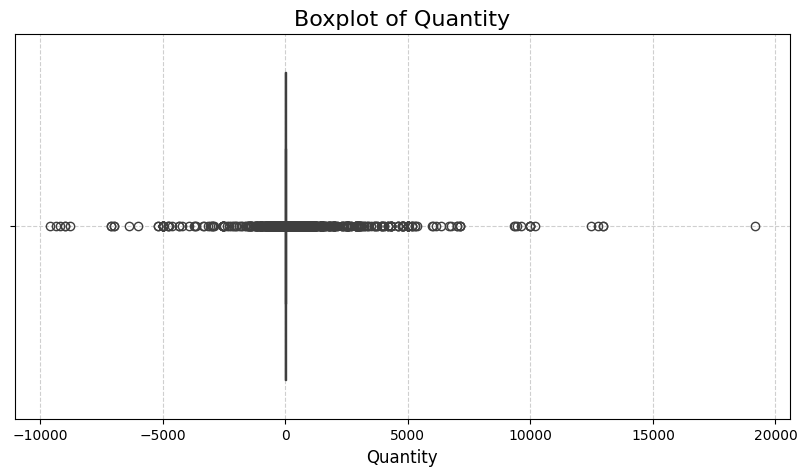

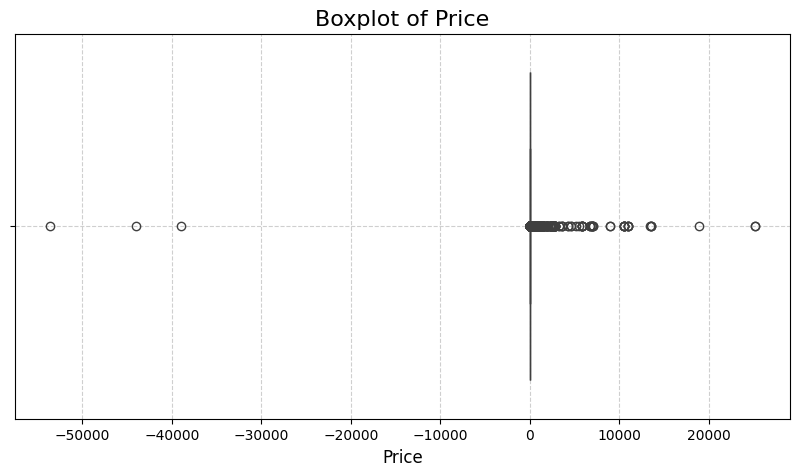

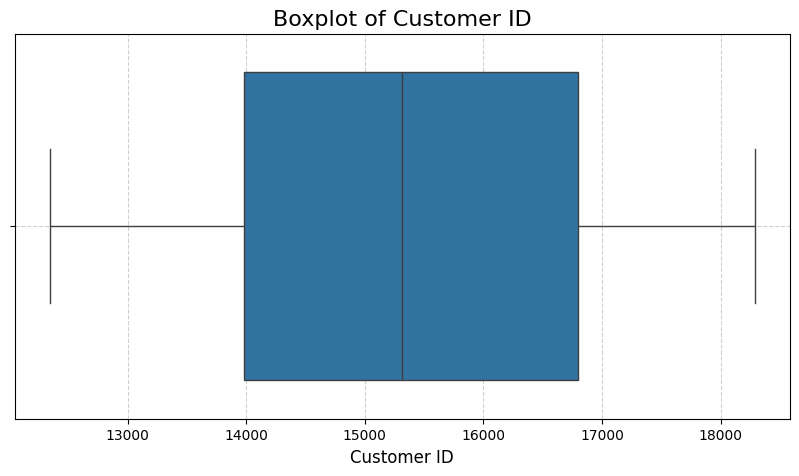

Jumlah outlier: 628

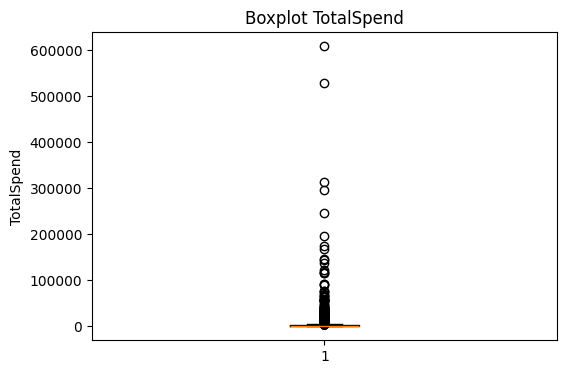

In [13]:
for column in numeric_columns:
    print(retaildf[column].describe())
print(CustomerSpend["TotalSpend"].describe())

def detect_outliers(retaildf, column):
    Q1 = retaildf[column].quantile(0.25)
    Q3 = retaildf[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = retaildf[
        (retaildf[column] < lower_bound) | (retaildf[column] > upper_bound)
    ]
    return outliers


if len(numeric_columns) > 0:
    for column in numeric_columns:
        
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[column])
        plt.title(f"Boxplot of {column}", fontsize=16)
        plt.xlabel(column, fontsize=12)
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.show()

Q1 = CustomerSpend["TotalSpend"].quantile(0.25)
Q3 = CustomerSpend["TotalSpend"].quantile(0.75)
IQR = Q3 - Q1

# batas bawah & batas atas outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# filter outliers
outliers = CustomerSpend[
    (CustomerSpend["TotalSpend"] < lower_bound) |
    (CustomerSpend["TotalSpend"] > upper_bound)
]
print("Jumlah outlier:", len(outliers))

plt.figure(figsize=(6,4))
plt.boxplot(CustomerSpend["TotalSpend"])
plt.title("Boxplot TotalSpend")
plt.ylabel("TotalSpend")
plt.show()



# Coding & Labeling


## 1 Quantity Coding


In [14]:
# 1. Pengelompokkan Quantity Buying
print(retaildf["Quantity"].nunique())
def categorized_quantity(df):
    bins = [0, 6, 51, 101, np.inf]  # 0–10, 11–100, 101–500, 501+
    labels = ["Very Small (1-5)", "Small (6-50)", "Medium (51-100)", "Bulk (101+)"]

    df["Quantity_Group"] = pd.cut(df["Quantity"], bins=bins, labels=labels, right=False)
    return df


# Print table helper
def print_table(df_subset, title):
    table = Table(title=title, title_style="bold yellow", show_lines=True)
    for column in df_subset.columns:
        table.add_column(column, style="white bold", justify="center", no_wrap=True)
    for _, row in df_subset.iterrows():
        table.add_row(*[str(item) for item in row])
    console = Console()
    console.print(table)


retaildf = categorized_quantity(retaildf)
quantity = retaildf[["Quantity", "Quantity_Group"]]
group_counts = retaildf["Quantity_Group"].value_counts().sort_index()
print(group_counts)
display(retaildf[["Quantity", "Quantity_Group"]].head(20))

438

Quantity_Group
Very Small (1-5)    406930
Small (6-50)        375303
Medium (51-100)      13428
Bulk (101+)           9959
Name: count, dtype: int64

,Quantity,Quantity_Group
0,12,Small (6-50)
1,12,Small (6-50)
2,12,Small (6-50)
3,48,Small (6-50)
4,24,Small (6-50)
5,24,Small (6-50)
6,24,Small (6-50)
7,10,Small (6-50)
8,12,Small (6-50)
9,12,Small (6-50)


## 2 Country Coding


In [15]:
country_mapping = {
    # UK
    "United Kingdom": "UK",
    "Channel Islands": "UK",
    "European Community": "Europe",  # or "Europe" if preferred
    # France
    "France": "Europe",
    # USA / North America
    "USA": "America",
    "Canada": "America",
    "Bermuda": "America",
    "West Indies": "America",
    # Europe (excluding UK, France)
    "Belgium": "Europe",
    "EIRE": "Europe",
    "Germany": "Europe",
    "Portugal": "Europe",
    "Denmark": "Europe",
    "Netherlands": "Europe",
    "Poland": "Europe",
    "Spain": "Europe",
    "Italy": "Europe",
    "Cyprus": "Europe",
    "Greece": "Europe",
    "Norway": "Europe",
    "Austria": "Europe",
    "Sweden": "Europe",
    "Finland": "Europe",
    "Switzerland": "Europe",
    "Malta": "Europe",
    "Lithuania": "Europe",
    "Czech Republic": "Europe",
    # Asia
    "Japan": "Asia",
    "Korea": "Asia",
    "Hong Kong": "Asia",
    # Other Asia
    "Singapore": "Asia",
    "Thailand": "Asia",
    "Lebanon": "Asia",
    "Saudi Arabia": "Asia",
    "United Arab Emirates": "Asia",
    "Bahrain": "Asia",
    # Other
    "Nigeria": "Afrika",
    "Brazil": "America",
    "Iceland": "Iceland",
    "RSA": "Asia",
    "Unspecified": "Other",
    "Israel": "Other",
}


print(retaildf["Country"].nunique())
retaildf["Country_Group"] = retaildf["Country"].map(country_mapping)
country_counts = retaildf["Country_Group"].value_counts().sort_index()
display(country_counts)
display(retaildf[["Country", "Country_Group"]].head(10))

41

Country_Group
Afrika         30
America       785
Asia         1572
Europe      73457
Iceland       253
Other         843
UK         726865
Name: count, dtype: int64

,Country,Country_Group
0,United Kingdom,UK
1,United Kingdom,UK
2,United Kingdom,UK
3,United Kingdom,UK
4,United Kingdom,UK
5,United Kingdom,UK
6,United Kingdom,UK
7,United Kingdom,UK
8,United Kingdom,UK
9,United Kingdom,UK


## 3 InvoiceDate Coding


In [ ]:
retaildf["InvoiceDate"] = pd.to_datetime(retaildf["InvoiceDate"])
retaildf["InvoiceMonth"] = retaildf["InvoiceDate"].dt.month_name()
months_counts = retaildf["InvoiceMonth"].value_counts().sort_index()
print(months_counts)
display(retaildf[["InvoiceDate", "InvoiceMonth"]].head(10))


InvoiceMonth
April         49882
August        53406
December      88731
February      43297
January       43010
July          53860
June          58376
March         59479
May           56966
November     124861
October       99120
September     74632
Name: count, dtype: int64

,InvoiceDate,InvoiceMonth
0,2009-12-01 07:45:00,December
1,2009-12-01 07:45:00,December
2,2009-12-01 07:45:00,December
3,2009-12-01 07:45:00,December
4,2009-12-01 07:45:00,December
5,2009-12-01 07:45:00,December
6,2009-12-01 07:45:00,December
7,2009-12-01 07:45:00,December
8,2009-12-01 07:46:00,December
9,2009-12-01 07:46:00,December


In [23]:
retaildf.to_csv("coding_retail.csv",index=False)

## 4 Total Spend Coding

In [17]:
bins = [0, 101, 501, 2001, CustomerSpend["TotalSpend"].max()] #range didasarkan pada deskripsi data. in dollar
labels = ["Low", "Medium", "High", "Very High"]

# Create the Spending Group column
CustomerSpend["Spending Group"] = pd.cut(
    CustomerSpend["TotalSpend"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

CustomerSpend[["Customer ID","TotalSpend", "Spending Group"]].head(10)
spending_counts = CustomerSpend["Spending Group"].value_counts().sort_index()
print(spending_counts)

Spending Group
Low           218
Medium       1822
High         2186
Very High    1655
Name: count, dtype: int64

# Tabulation


In [18]:
month_order = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

quantityMonth = pd.crosstab(retaildf["InvoiceMonth"], retaildf["Quantity_Group"])

quantityMonth = quantityMonth.reindex(month_order)  # urutkan bulan
display(quantityMonth)

# Country Month
countryMonth = pd.crosstab(retaildf["InvoiceMonth"], retaildf["Country_Group"])

countryMonth = countryMonth.reindex(month_order)  # urutkan bulan
display(countryMonth)

# Country and Quantity Group

countryQuantity = pd.crosstab(retaildf["Country_Group"], retaildf["Quantity_Group"])

display(countryQuantity)

#Total Spend per Country
totalQuantity = pd.crosstab(retaildf["InvoiceMonth"], CustomerSpend["Spending Group"])
display(totalQuantity)

Quantity_Group,Very Small (1-5),Small (6-50),Medium (51-100),Bulk (101+)
InvoiceMonth,,,,
January,20953,20564,773,720
February,21516,20385,804,592
March,29828,27894,967,790
April,24181,24250,858,593
May,27672,27498,1062,734
June,29563,26961,1044,808
July,25601,26607,993,659
August,24241,27209,1086,870
September,33181,39089,1378,984


Country_Group,Afrika,America,Asia,Europe,Iceland,Other,UK
InvoiceMonth,,,,,,,
January,1,105,102,4793,29,64,37789
February,0,0,272,3773,0,16,39115
March,0,10,87,5276,0,0,53979
April,0,54,139,3824,24,30,45776
May,0,16,51,5418,0,47,51258
June,0,93,53,5684,18,9,52240
July,0,103,212,5000,0,287,48081
August,29,59,75,5533,22,194,47380
September,0,62,149,7691,0,110,66497


Quantity_Group,Very Small (1-5),Small (6-50),Medium (51-100),Bulk (101+)
Country_Group,,,,
Afrika,27,3,0,0
America,252,527,2,4
Asia,292,1111,113,56
Europe,17612,51071,2481,2293
Iceland,47,205,0,1
Other,310,524,8,1
UK,388098,320885,10576,7306


Spending Group,Low,Medium,High,Very High
InvoiceMonth,,,,
December,144,1180,1458,1127


# Visualization


## Quantitiy Visualization


C:\Users\prith\AppData\Local\Temp\ipykernel_14212\1522472270.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("PuRd")


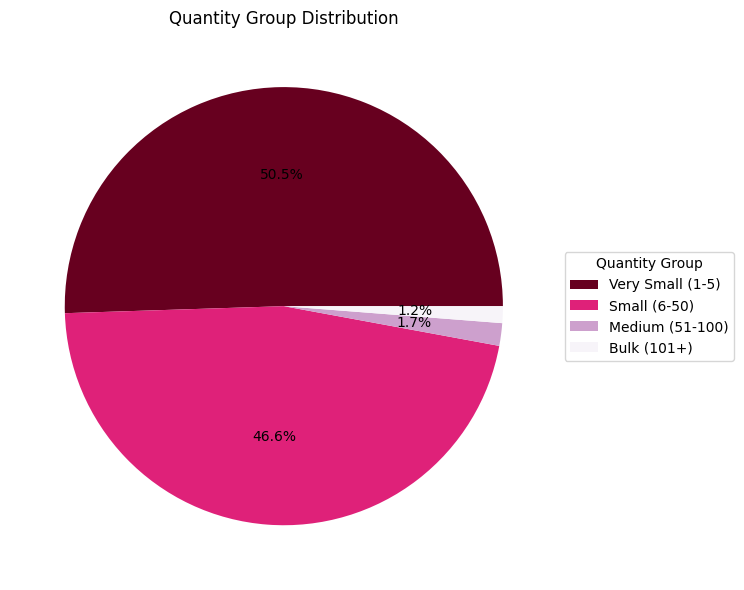

In [19]:
from matplotlib import cm

cmap = cm.get_cmap("PuRd")
colors = cmap(np.linspace(1, 0, len(group_counts)))

# Visualization
plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(
    group_counts, labels=None, autopct="%1.1f%%", startangle=0, colors=colors
)

# Legend in correct order
plt.legend(
    patches,
    group_counts.index,
    title="Quantity Group",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)

plt.title("Quantity Group Distribution")
plt.tight_layout()
plt.show()

## Total Spending

C:\Users\prith\AppData\Local\Temp\ipykernel_14212\78731863.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  map = cm.get_cmap("PuRd")


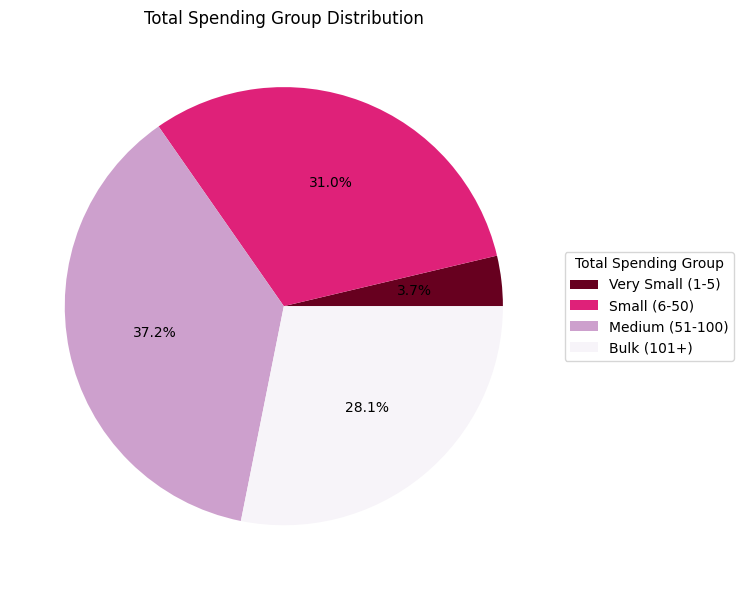

In [20]:
map = cm.get_cmap("PuRd")
colors = cmap(np.linspace(1, 0, len(spending_counts)))

# Visualization
plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(
    spending_counts, labels=None, autopct="%1.1f%%", startangle=0, colors=colors
)

# Legend in correct order
plt.legend(
    patches,
    group_counts.index,
    title="Total Spending Group",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)

plt.title("Total Spending Group Distribution")
plt.tight_layout()
plt.show()

## Country


C:\Users\prith\AppData\Local\Temp\ipykernel_14212\3135397727.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("RdPu")


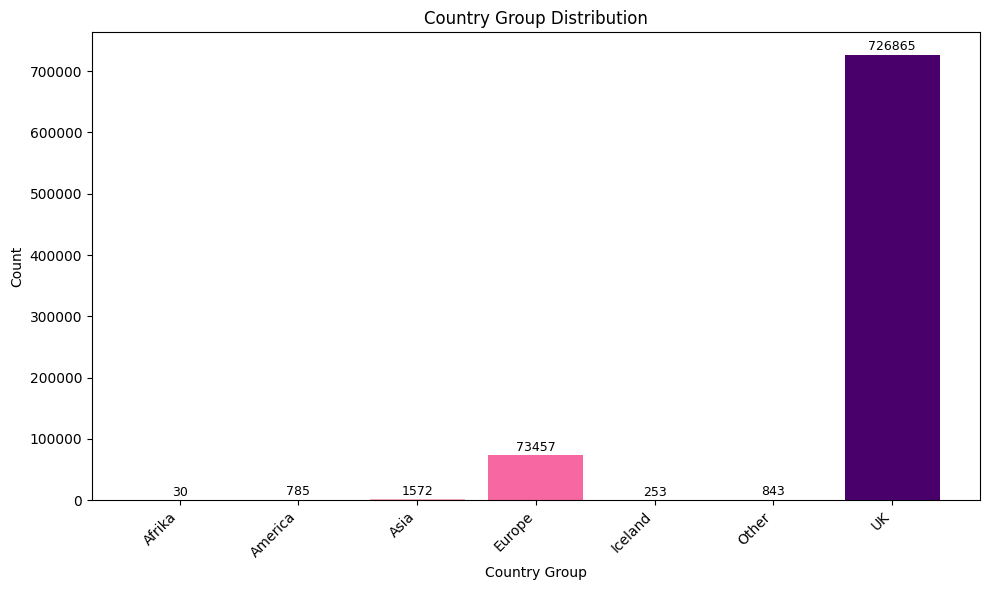

C:\Users\prith\AppData\Local\Temp\ipykernel_14212\3135397727.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("PuRd")


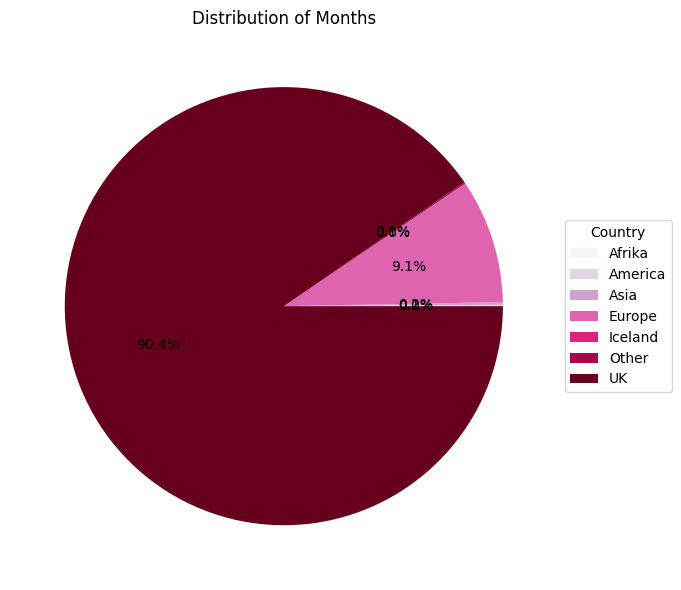

In [21]:
values = country_counts.values
labels = country_counts.index

import matplotlib.cm as cm

# generate colors using a Matplotlib colormap
cmap = cm.get_cmap("RdPu")
colors = cmap(np.linspace(0, 1, len(values)))

# draw bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=colors)

# label styling
plt.xlabel("Country Group")
plt.ylabel("Count")
plt.title("Country Group Distribution")

# rotate x-labels for readability
plt.xticks(rotation=45, ha="right")

# put count labels on top of each bar
for i, v in enumerate(values):
    plt.text(i, v + max(values) * 0.01, str(v), ha="center", fontsize=9)

plt.tight_layout()
plt.show()

# piechart
cmap = cm.get_cmap("PuRd")
colors = cmap(np.linspace(0, 1, len(country_counts)))

# Visualization
plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(
    country_counts, labels=None, autopct="%1.1f%%", startangle=0, colors=colors
)

# Legend in correct order
plt.legend(
    patches,
    country_counts.index,
    title="Country",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)

plt.title("Distribution of Months")
plt.tight_layout()
plt.show()

## Month


C:\Users\prith\AppData\Local\Temp\ipykernel_14212\2668758808.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("PuRd")


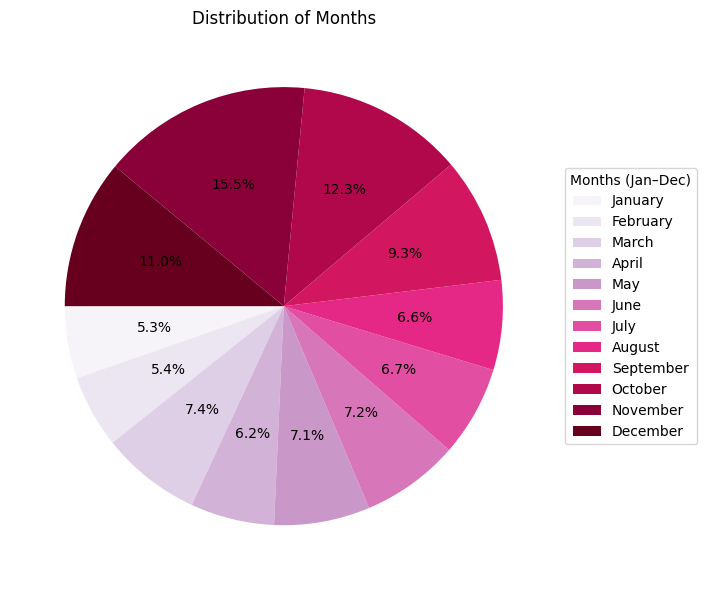

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# Ensure the index is month names, then sort by actual month order
month_order = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

# Reindex to enforce month order
months_counts = months_counts.reindex(month_order)

# Generate sequential colors (lig+ht → dark) for 12 months
cmap = cm.get_cmap("PuRd")
colors = cmap(np.linspace(0, 1, len(months_counts)))

# Visualization
plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(
    months_counts, labels=None, autopct="%1.1f%%", startangle=180, colors=colors
)

# Legend in correct order
plt.legend(
    patches,
    months_counts.index,
    title="Months (Jan–Dec)",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)

plt.title("Distribution of Months")
plt.tight_layout()
plt.show()